# 短文字壓縮測試

## 目的
不使用DB或任何存檔手段，將72字元無損壓縮成32內字元，以符合API限制。

## 現階段結果
- 因字串過短壓縮後又需用Base64轉成可被API傳送的字元，無法達32字元目標。
- 若資料量越大則壓縮效果越明顯但1k始終沒法達成目標。

## 思考方向
- 壓縮後結果不用Base64再轉字串，因爲Base64將會讓資料大4/3倍。

## 主流壓縮方式測試

### 72字元壓縮測試->目標32字元內

In [5]:
import string
import random
inStrCount = 72
inStr = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount))
lenInStr = len(inStr)
print("InStr(" + str(len(inStr)) + "):" + inStr)

repeatStr = 'STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW'
print("RepeatStr(" + str(len(repeatStr)) + "):" + repeatStr)


inStr100x = ''.join(random.choices(string.ascii_uppercase + string.digits, k=inStrCount*100))
lenInStr100x = len(inStr100x)
print("InStr 100x(" + str(len(inStr100x)) + ")")

compressResultLists = []

#Hex
import binascii
hexData = binascii.b2a_hex(inStr.encode("ascii"))
hexStr = hexData.decode("ascii")
print("InToHex(" + str(len(hexStr)) + "):" + hexStr)

#Base64 encode
import base64
def strBase64encodeToStr(oriStr):
    encodedBytes = base64.urlsafe_b64encode(oriStr.encode("utf-8"))
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

def bytesBase64encodeToStr(oriBytes):
    encodedBytes = base64.urlsafe_b64encode(oriBytes)
    encodedStr = str(encodedBytes, "utf-8")
    return encodedStr

b64Str = strBase64encodeToStr(inStr)
b64Data = b64Str.encode("ascii")
print("InToBase64(" + str(len(b64Str)) + "):" + b64Str)

#bytesToStr
def bytesToStr(oriData):
    return bytesBase64encodeToStr(oriData)
    #return "".join( chr(x) for x in bytearray(oriData) )

#Brotli
print("\n=== Brotli(Google) ===")
!pip install brotli
import brotli

def bytesBrotliToStr(oriData):
    compressed = brotli.compress(oriData, quality=11)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBrotliToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <Brotli> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBrotliToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <Brotli> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBrotliToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <Brotli> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBrotliToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <Brotli> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBrotliToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['BROTLI', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#bzip2
print("\n=== bzip2 ===")
#!pip install bz2
import bz2

def bytesBzip2ToStr(oriData):
    compressed = bz2.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesBzip2ToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <bzip2> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesBzip2ToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <bzip2> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesBzip2ToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <bzip2> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesBzip2ToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <bzip2> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesBzip2ToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['BZIP2', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#lzma
print("\n=== lzma(7z) ===")
#!pip install lzma
import lzma

def bytesLzmaToStr(oriData):
    compressed = lzma.compress(oriData)
    result = bytesToStr(compressed)
    return result


outStrOri = bytesLzmaToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <lzma> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesLzmaToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <lzma> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesLzmaToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <lzma> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesLzmaToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <lzma> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesLzmaToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['LZMA', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


#zstd
print("\n=== zstd(Facebook)===")
!pip install zstandard
import zstandard
      
def bytesZstdToStr(oriData):
    zstd = zstandard.ZstdCompressor()
    compressed = zstd.compress(oriData)
    result = bytesToStr(compressed)
    return result
      
      
outStrOri = bytesZstdToStr(inStr.encode("utf-8"))
lenStrOri =  len(outStrOri)
print("Out <zstd> Ori(" + str(lenStrOri) + "):" + outStrOri)

outStrHex = bytesZstdToStr(hexData)
lenStrHex =  len(outStrHex)
print("Out <zstd> Hex(" + str(lenStrHex) + "):" + outStrHex)

outStrBase64 = bytesZstdToStr(b64Data)
lenStrBase64 =  len(outStrBase64)
print("Out <zstd> B64(" + str(lenStrBase64) + "):" + outStrBase64)

outStrRepeat = bytesZstdToStr(repeatStr.encode("utf-8"))
lenStrRepeat =  len(outStrRepeat)
print("Out <zstd> Repeat(" + str(lenStrRepeat) + "):" + outStrRepeat)

outStr100x = bytesZstdToStr(inStr100x.encode("utf-8"))
lenStr100x =  len(outStr100x)
print("Out <Brotli> 100x(" + str(lenStr100x) + ")")

rateStr = lenStrOri / lenInStr
rateHex = lenStrHex / lenInStr
rateBase64 = lenStrBase64 / lenInStr
rateRepeat = lenStrRepeat / lenInStr
rateStr100x = lenStr100x / lenInStr100x

compressResultLists.append(['ZSTD', lenInStr, lenStrOri, rateStr, lenStrHex, rateHex, lenStrBase64, rateBase64, lenStrRepeat, rateRepeat, lenStr100x, rateStr100x])


InStr(72):IYNHFWOC6KRZZP00GYTVWDK200AEZVA4IXWLMOTFJ7685QJM1WB6MNOISNFA66U77AYV7C5S
RepeatStr(149):STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW STACK OVERFLOW
InStr 100x(7200)
InToHex(144):49594e4846574f43364b525a5a5030304759545657444b32303041455a5641344958574c4d4f54464a37363835514a4d315742364d4e4f49534e4641363655373741595637433553
InToBase64(96):SVlOSEZXT0M2S1JaWlAwMEdZVFZXREsyMDBBRVpWQTRJWFdMTU9URko3Njg1UUpNMVdCNk1OT0lTTkZBNjZVNzdBWVY3QzVT

=== Brotli(Google) ===
Out <Brotli> Ori(84):G0cA-GVwXqyDqnUWRCKFAhy_FtzTNcvr_wcA_jv3YzLK0v63JPF9Su3HJc4EnanCR7HaetzNScYuzuV3c003
Out <Brotli> Hex(108):G48A-AVybMUq7gbSov9qKRJcDFGh3VwW6eIhJZ-nt7eHhgblNk4X8GlqaBDY20kI2svFz-EZkq1SaskONkfhYio5XB5tcUlCqbRVKsLtVCEC
Out <Brotli> B64(136):iy-AU1ZsT1NFWlhUME0yUzFKYVdsQXdNRWRaVkZaWFJFc3lNREJCUlZwV1FUUkpXRmRNVFU5VVJrbzNOamcxVVVwTk1WZENOazFPVDBsVFRrWkJOalpWTnpkQldWWTNRelZUAw==
Out <Brotli> Repeat(36):G5QA-I2Uq7NLOTRFVUFL5

## 比較壓縮率

In [9]:
compressMethodList = ['BROTLI', 'BZIP2', 'LZMA', 'ZSTD']

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

compResNpArray = np.array(compressResultLists)
resultDF = pd.DataFrame(compResNpArray, columns=['Method','Origin', 'C-Str', 'C-StrR', 'C-Hex', 'C-HexR', 'C-Base64', 'C-Base64R', 'C-Repeat', 'C-RepeatR', 'C-Str100x', 'C-Str100xR'], index=compressMethodList)
print(resultDF)


rateDF = resultDF[['C-StrR', 'C-HexR', 'C-Base64R', 'C-RepeatR', 'C-Str100xR']]
rateLists = rateDF.values.tolist()
print(rateLists)

chartLabList = ['原字串', '轉Hex', '轉Base64', '重複字串', '100x長度']

        Method Origin C-Str              C-StrR C-Hex              C-HexR  \
BROTLI  BROTLI     72    84  1.1666666666666667   108                 1.5   
BZIP2    BZIP2     72   140  1.9444444444444444   144                 2.0   
LZMA      LZMA     72   172   2.388888888888889   236  3.2777777777777777   
ZSTD      ZSTD     72   108                 1.5   128  1.7777777777777777   

       C-Base64           C-Base64R C-Repeat           C-RepeatR C-Str100x  \
BROTLI      136  1.8888888888888888       36                 0.5      6268   
BZIP2       172   2.388888888888889       88  1.2222222222222223      6384   
LZMA        204  2.8333333333333335      120  1.6666666666666667      6560   
ZSTD        136  1.8888888888888888       44  0.6111111111111112      6300   

                C-Str100xR  
BROTLI  0.8705555555555555  
BZIP2   0.8866666666666667  
LZMA    0.9111111111111111  
ZSTD                 0.875  
[['1.1666666666666667', '1.5', '1.8888888888888888', '0.5', '0.870555555555555

## 壓縮挑選法參考依據
https://quixdb.github.io/squash-benchmark/unstable/

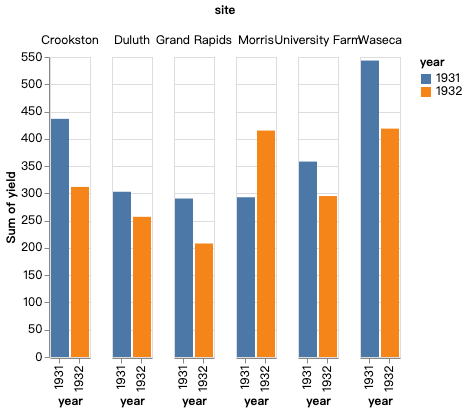

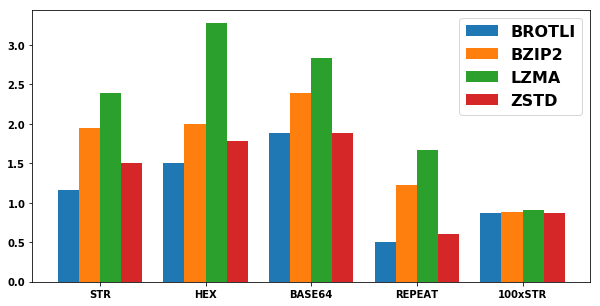

In [10]:
import matplotlib.pyplot as plt

N = 5

fig, ax = plt.subplots(sharex=False, figsize=(10,5))

font = {'family' : 'sans-serif',
'weight' : 'bold',
'size'  : '16'}
plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）

value1 = [float(i) for i in rateLists[0]]
value2 = [float(i) for i in rateLists[1]]
value3 = [float(i) for i in rateLists[2]]
value4 = [float(i) for i in rateLists[3]]

ind = np.arange(N)    # the x locations for the groups
width = 0.2       # the width of the bars
p1 = ax.bar(ind, value1, width)
p2 = ax.bar(ind+width, value2, width)
p3 = ax.bar(ind+2*width, value3, width)
p4 = ax.bar(ind+3*width, value4, width)

#ax.set_title("72字元短文字壓縮率比較(越低越佳)")
ax.set_xticks(ind + 1.5*width)
#plt.xticks(index+gap, index)
ax.set_xticklabels(('STR', 'HEX', 'BASE64', 'REPEAT', '100xSTR'))

ax.legend((p1[0], p2[0], p3[0], p4[0] ), ('BROTLI', 'BZIP2', 'LZMA', 'ZSTD'))
ax.autoscale_view()

plt.show()